In [53]:
import gym
import numpy as np
import time
from uofgsocsai import LochLomondEnv # load the class defining the custom Open AI Gym problem
import os, sys
import networkx as nx

print("Working dir:"+os.getcwd())
print("Python version:"+sys.version)

Working dir:/Users/deadfish/Desktop/MSc DataAnalytics/AI/Assessment/source
Python version:3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [54]:
from copy import deepcopy 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

In [55]:
import networkx as nx
print("networkx version:"+nx.__version__)

networkx version:2.2


In [56]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
print("ipywidgets version:" + widgets.__version__)

ipywidgets version:7.4.2


In [121]:
# Setup the parameters for the specific problem (you can change all of these if you want to) 
problem_id = 1     # problem_id \in [0:7] generates 8 diffrent problems on which you can train/fine-tune your agent 
reward_hole = 0.0     # should be less than or equal to 0.0 (you can fine tune this  depending on you RL agent choice)
is_stochastic = True  # should be False for A-star (deterministic search) and True for the RL agent

max_episodes = 200  # you can decide you rerun the problem many times thus generating many episodes... you can learn from them all!
max_iter_per_episode =50 # you decide how many iterations/actions can be executed per episode

In [122]:
#Generate the specific problem 
env = LochLomondEnv(problem_id=problem_id, is_stochastic=False,   reward_hole=reward_hole)

In [123]:
# Let's visualize the problem/env
print(env.desc)

[[b'S' b'S' b'S' b'F' b'F' b'S' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'H' b'H' b'F' b'F' b'F' b'H' b'F']
 [b'F' b'H' b'F' b'F' b'H' b'F' b'H' b'F']
 [b'G' b'F' b'F' b'G' b'G' b'G' b'F' b'H']]


In [124]:
from helpers import *

AIMA_TOOLBOX_ROOT="/Users/deadfish/Desktop/MSc DataAnalytics/AI/aima-python-master"
sys.path.append(AIMA_TOOLBOX_ROOT)

from search import *

In [125]:
# Create a representation of the state space for use with AIMA A-star
state_space_locations, state_space_actions, state_initial_id, state_goal_id = env2statespace(env)

In [126]:
print(state_space_locations)

{'S_0_0': (0, 0), 'S_0_1': (0, 1), 'S_0_2': (0, 2), 'S_0_3': (0, 3), 'S_0_4': (0, 4), 'S_0_5': (0, 5), 'S_0_6': (0, 6), 'S_0_7': (0, 7), 'S_1_0': (1, 0), 'S_1_1': (1, 1), 'S_1_2': (1, 2), 'S_1_3': (1, 3), 'S_1_4': (1, 4), 'S_1_5': (1, 5), 'S_1_6': (1, 6), 'S_1_7': (1, 7), 'S_2_0': (2, 0), 'S_2_1': (2, 1), 'S_2_2': (2, 2), 'S_2_4': (2, 4), 'S_2_5': (2, 5), 'S_2_6': (2, 6), 'S_2_7': (2, 7), 'S_3_0': (3, 0), 'S_3_1': (3, 1), 'S_3_2': (3, 2), 'S_3_3': (3, 3), 'S_3_4': (3, 4), 'S_3_6': (3, 6), 'S_3_7': (3, 7), 'S_4_0': (4, 0), 'S_4_1': (4, 1), 'S_4_2': (4, 2), 'S_4_4': (4, 4), 'S_4_5': (4, 5), 'S_4_6': (4, 6), 'S_4_7': (4, 7), 'S_5_0': (5, 0), 'S_5_3': (5, 3), 'S_5_4': (5, 4), 'S_5_5': (5, 5), 'S_5_7': (5, 7), 'S_6_0': (6, 0), 'S_6_2': (6, 2), 'S_6_3': (6, 3), 'S_6_5': (6, 5), 'S_6_7': (6, 7), 'S_7_0': (7, 0), 'S_7_1': (7, 1), 'S_7_2': (7, 2), 'S_7_3': (7, 3), 'S_7_4': (7, 4), 'S_7_5': (7, 5), 'S_7_6': (7, 6)}


In [127]:
state_space=UndirectedGraph(state_space_actions)

In [128]:
# initialise a graph
G = nx.Graph()

# use this while labeling nodes in the map
node_labels = dict()
node_colors = dict()
for n, p in state_space_locations.items():
    G.add_node(n)            # add nodes from locations
    node_labels[n] = n       # add nodes to node_labels
    node_colors[n] = "white" # node_colors to color nodes while exploring the map

# we'll save the initial node colors to a dict for later use
initial_node_colors = dict(node_colors)
    
# positions for node labels
node_label_pos = {k:[v[0],v[1]-0.25] for k,v in state_space_locations.items()} # spec the position of the labels relative to the nodes

# use this while labeling edges
edge_labels = dict()

# add edges between nodes in the map - UndirectedGraph defined in search.py
for node in state_space.nodes():
    connections = state_space.get(node)
    for connection in connections.keys():
        distance = connections[connection]        
        G.add_edge(node, connection) # add edges to the graph        
        edge_labels[(node, connection)] = distance # add distances to edge_labels
        
print("Done creating the graph object")

Done creating the graph object


In [129]:
def show_map(node_colors):
    # set the size of the plot
    plt.figure(figsize=(16,13))
    # draw the graph (both nodes and edges) with locations
    nx.draw(G, pos = state_space_locations, node_color = [node_colors[node] for node in G.nodes()])

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos = node_label_pos, labels = node_labels, font_size = 9)
    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos = state_space_locations, edge_labels=edge_labels, font_size = 8)
    
    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle,green_circle),
               ('Un-explored', 'Frontier', 'Currently exploring', 'Explored', 'Solution path'),
               numpoints=1,prop={'size':16}, loc=(.8,1.0))
    

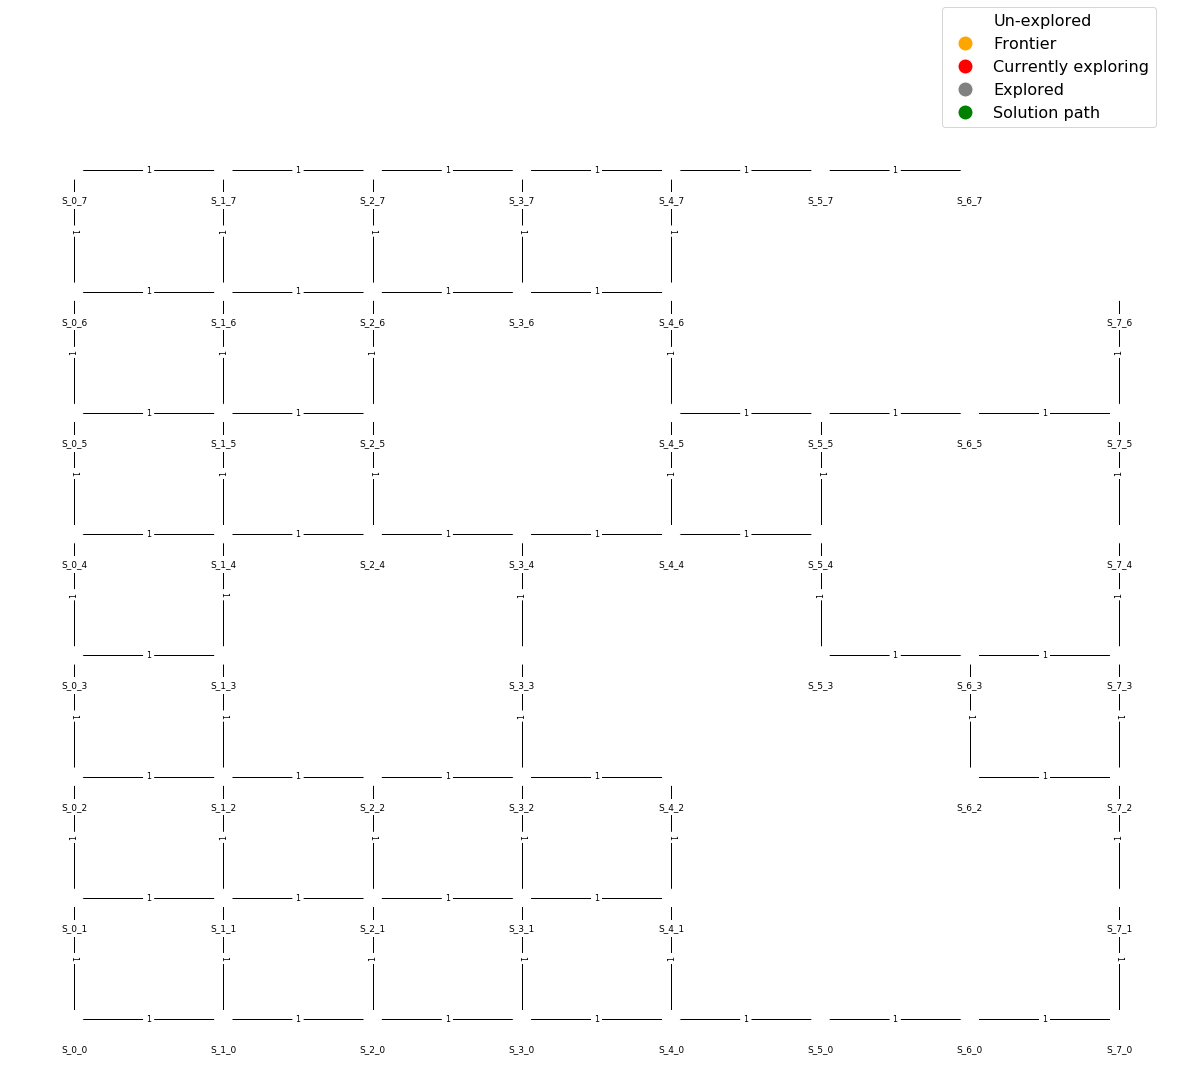

In [130]:
show_map(node_colors)

In [131]:
maze_problem = GraphProblem(state_initial_id, state_goal_id, state_space)

print("Initial state: " + state_initial_id)
print("Goal state: "    + state_goal_id)

Initial state: S_0_5
Goal state: S_7_5


In [132]:
def my_best_first_graph_search(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None
   # return iterations

In [133]:
def my_astar_search(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h') # define the heuristic function
    return my_best_first_graph_search(problem, lambda n: n.path_cost + h(n))

In [134]:
def final_path_colors(problem, solution):
    "returns a node_colors dict of the final path provided the problem and solution"
    
    # get initial node colors
    final_colors = dict(initial_node_colors)
    # color all the nodes in solution and starting node to green
    final_colors[problem.initial] = "green"
    for node in solution:
        final_colors[node] = "green"  
    return final_colors

    
def display_visual(user_input, algorithm=None, problem=None):
    if user_input == False:
        def slider_callback(iteration):
            # don't show graph for the first time running the cell calling this function
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                global all_node_colors
                
                iterations, all_node_colors, node = algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))
                
                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
                    #time.sleep(3.)
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)

----------------------------------------
Identified goal state:<Node S_7_5>
----------------------------------------
Number of Steps: 9
----------------------------------------
Solution trace:[<Node S_7_5>, <Node S_6_5>, <Node S_5_5>, <Node S_4_5>, <Node S_4_4>, <Node S_3_4>, <Node S_2_4>, <Node S_1_4>, <Node S_0_4>, <Node S_0_5>]
----------------------------------------
Final solution path:
iteration used: 160


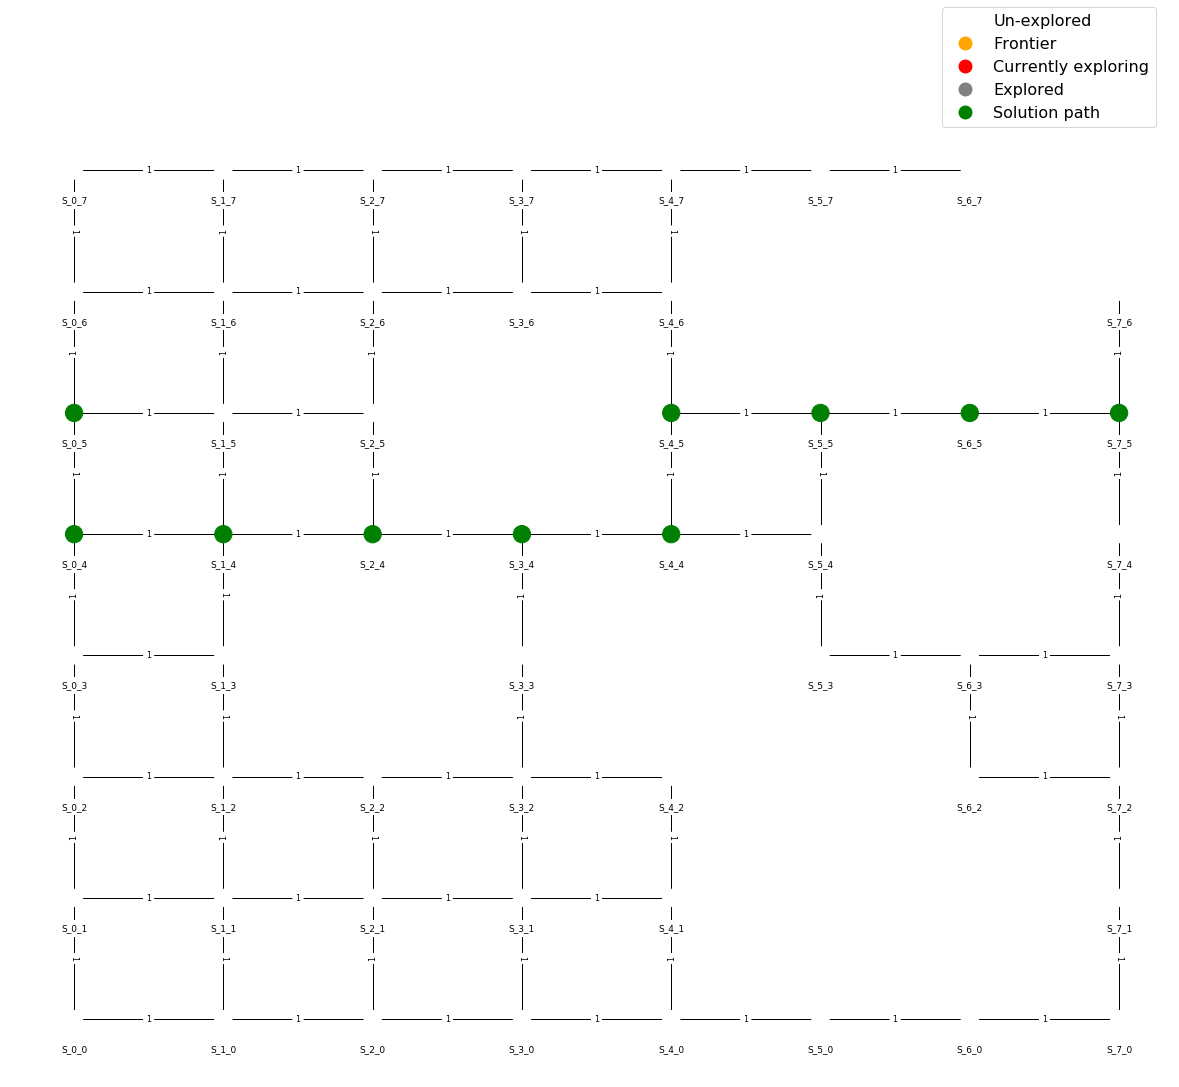

In [135]:
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search(problem=maze_problem, h=None)
i = 0
#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != state_initial_id:  
    i +=1
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Number of Steps: " +str(i+1))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")
print("Final solution path:")
show_map(final_path_colors(maze_problem, node.solution()))
print("iteration used: "+str(iterations))

In [136]:
filename = "simple_out"
content = "\n--------------------------"+"\n problem_id :   "+str(problem_id)+"\n Identified goal state:   "+str(solution_path[0])+"\n Number of Steps:   " +str(i+1) +"\n Solution trace:   "+str(solution_path) +"\n iteration used:   "+str(iterations)
with open(filename+".txt", "a") as f:
   f.write(str(content))